Linear: y = 5x + 10 Test MAE: 0.00011467210424598306
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


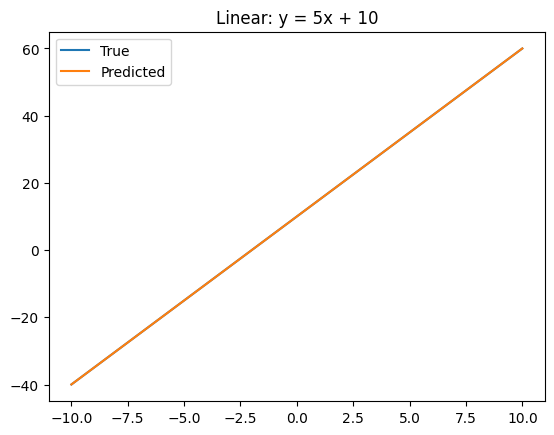

Quadratic: y = 3x^2 + 5x + 10 Test MAE: 0.002186000579968095
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


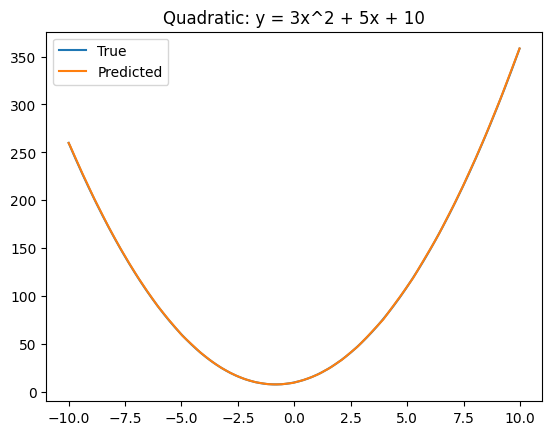

Cubic: y = 4x^3 + 3x^2 + 5x + 10 Test MAE: 0.0013007029192522168
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


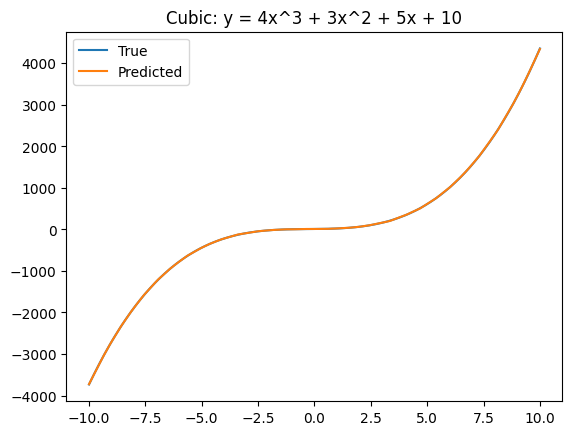

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# ---------------- MODEL ----------------
def build_model():
    inputs = Input(shape=(1,))
    h0 = Dense(32, activation='relu')(inputs)
    h1 = Dense(64, activation='relu')(h0)
    h2 = Dense(32, activation='relu')(h1)
    outputs = Dense(1)(h2)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# ---------------- POLYNOMIALS ----------------
def linear_fn(x):
    return 5*x + 10

def quadratic_fn(x):
    return 3*x**2 + 5*x + 10

def cubic_fn(x):
    return 4*x**3 + 3*x**2 + 5*x + 10


# ---------------- DATA ----------------
def generate_data(fn, n=20000):
    x = np.random.uniform(-10, 10, n).reshape(-1,1)
    y = fn(x)
    return x, y


def split_data(x, y):
    idx = np.random.permutation(len(x))
    x, y = x[idx], y[idx]

    train_n = int(0.7*len(x))
    val_n   = int(0.1*len(x))

    trainX,trainY = x[:train_n], y[:train_n]
    valX,valY     = x[train_n:train_n+val_n], y[train_n:train_n+val_n]
    testX,testY   = x[train_n+val_n:], y[train_n+val_n:]

    return (trainX,trainY),(valX,valY),(testX,testY)


# ---------------- TRAIN & PLOT ----------------
def run_experiment(fn, title):
    x, y = generate_data(fn)

    # scaling
    xs = StandardScaler()
    ys = StandardScaler()
    x = xs.fit_transform(x)
    y = ys.fit_transform(y)

    (trainX,trainY),(valX,valY),(testX,testY) = split_data(x,y)

    model = build_model()
    history = model.fit(trainX, trainY,
                        validation_data=(valX,valY),
                        epochs=50,
                        batch_size=128,
                        verbose=0)

    loss, mae = model.evaluate(testX, testY, verbose=0)
    print(title, "Test MAE:", mae)

    y_pred = model.predict(testX)

    # inverse scaling for plotting
    testX_inv = xs.inverse_transform(testX)
    testY_inv = ys.inverse_transform(testY)
    y_pred_inv = ys.inverse_transform(y_pred)

    # sort for smooth plot
    idx = np.argsort(testX_inv[:,0])
    plt.figure()
    plt.plot(testX_inv[idx], testY_inv[idx], label="True")
    plt.plot(testX_inv[idx], y_pred_inv[idx], label="Predicted")
    plt.title(title)
    plt.legend()
    plt.show()


# ---------------- MAIN ----------------
def main():
    run_experiment(linear_fn, "Linear: y = 5x + 10")
    run_experiment(quadratic_fn, "Quadratic: y = 3x^2 + 5x + 10")
    run_experiment(cubic_fn, "Cubic: y = 4x^3 + 3x^2 + 5x + 10")

if __name__ == "__main__":
    main()
